_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1176)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               141240    
_________________________________________________________________
dense_11 (Dense)             (None, 84)                10164     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                850       
Total params: 152,710
Trainable params: 152,710
Non-trainable params: 0
_________________________________________________________________
None

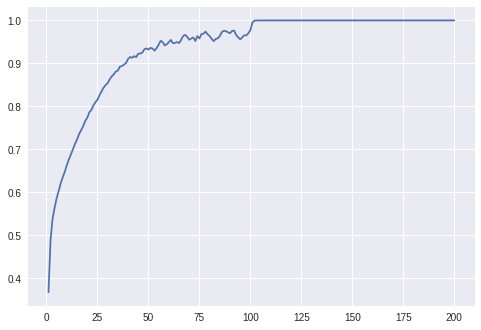

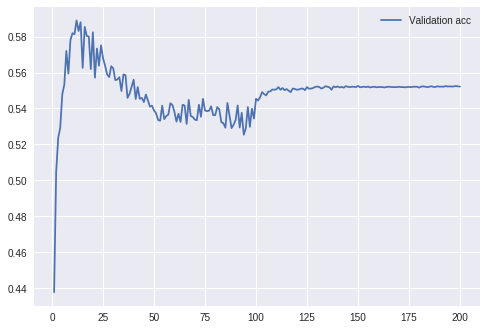

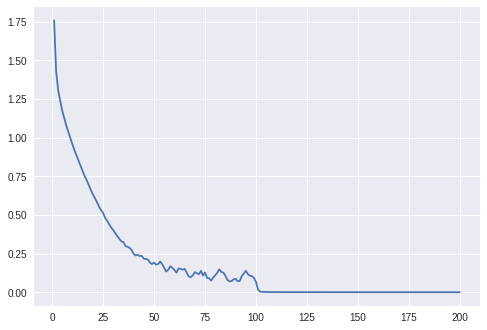

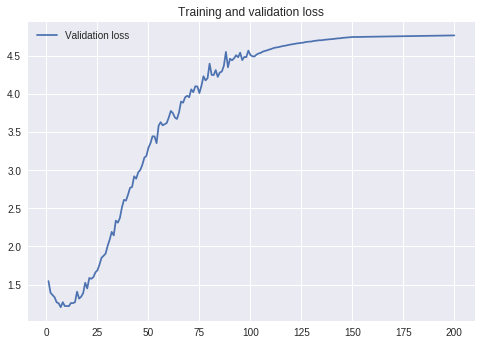

[[5.32725408e-19 7.36579852e-29 3.28041888e-22 ... 1.14484826e-20
  1.36250028e-05 2.77266054e-23]
 [3.67771563e-10 6.55805245e-02 3.11820661e-26 ... 5.36789055e-29
  9.34419513e-01 1.71619574e-09]
 [8.37386772e-02 1.00489622e-02 1.43188680e-21 ... 1.10882840e-16
  9.06212389e-01 1.29348212e-08]
 ...
 [3.13610402e-16 6.56750531e-35 2.20393512e-11 ... 4.80078086e-07
  5.69925479e-25 7.77194253e-32]
 [1.02532734e-17 1.12952555e-11 5.70107049e-30 ... 5.44954019e-20
  3.59561543e-25 6.12802074e-19]
 [1.82035934e-29 3.41275818e-21 5.09014523e-18 ... 1.00000000e+00
  0.00000000e+00 2.93896383e-21]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
Saved model to disk


In [9]:
import keras
from keras import optimizers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.callbacks import LearningRateScheduler, TensorBoard
import matplotlib.pyplot as plt

def build_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

def scheduler(epoch):
    if epoch < 100:
        return 0.01
    if epoch < 150:
        return 0.005
    return 0.001
def plot_history(net_history,loss,acc):
    val_acc = net_history.history['val_acc']
    print(val_acc)
    import matplotlib.pyplot as plt
    history=net_history.history
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    
    

if __name__ == "__main__":

    # load data
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255.0
    x_test /= 255.0

    # build network
    model = build_model()
    print(model.summary())

    # set callback
    tb_cb = TensorBoard(log_dir='./lenet', histogram_freq=0)
    change_lr = LearningRateScheduler(scheduler)
    cbks = [change_lr,tb_cb]

    # start train
    
    history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=200,
              callbacks=cbks,
              validation_data=(x_test, y_test),
              shuffle=True)
    #plot_history(networkhistory)
    #ecvaluation
    test_loss,test_acc = model.evaluate(x_test,y_test)
    print("ssss")
   # plottest(test_loss,test_acc)
    test_labels_p=model.predict(x_test)
    import numpy as np
    test_labels_p=np.argmax(test_labels_p, axis =1)
    print( test_labels_p)
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, label='Training acc')
    plt.figure()
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.figure()
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    from sklearn.metrics import confusion_matrix
    y_pred=model.predict(x_test)
    print(y_pred)
    print(y_test)
    

    #model.save_weights('C:\Users\sepehr\Downloads\shiri\HW5 (1)\model.ml')
    print("Saved model to disk")

In [12]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131284 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (28, 28),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (28, 28),
                                            batch_size = 16,
                                            class_mode = 'categorical'

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive


In [11]:
!ls drive

ls: cannot access 'drive': No such file or directory


In [0]:
import json
from tensorflow import keras
# serialize weights to HDF5
model_json = model.to_json()
with open("drive/salam/model.json", "w") as json_file:
    json_file.write(model_json)  
 


In [0]:

model.save_weights("drive/app/model_weights.h5")    


In [0]:
from matplotlib import pyplot
from scipy.misc import toimage
from keras.datasets import cifar10
from keras.models import model_from_json
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# mean-std normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
show_imgs(x_test[:16])
 
# Load trained CNN model
json_file = open('drive/app/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('drive/app/model_weights.h5')
 
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[:16]),1)
print ([labels[x] for x in indices])

In [0]:
#bakhshe layer
layer_outputs = [layer.output for layer in model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation
first_layer_activation = activations[0]
